### Introduction

Here I'm testing a DQN on the lunar landing environment. I'm using 

1. Experience replay
2. A target network.

I update the target network every $C$ timesteps.

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, -147.8361842993836)
(episode, score) = (100, -100.07254878061599)
(episode, score) = (150, -91.10364614138199)
(episode, score) = (200, -26.5779211507039)
(episode, score) = (250, -379.02775870849723)
(episode, score) = (300, -337.8714542430519)
(episode, score) = (350, -172.23452476247652)
(episode, score) = (400, -409.5024867561764)
(episode, score) = (450, -389.02429678779276)
(episode, score) = (500, -119.81956121825948)
(episode, score) = (550, -230.9036397098359)
(episode, score) = (600, -132.8073315256779)
(episode, score) = (650, -151.88093944719043)
(episode, score) = (700, -459.56809554105905)
(episode, score) = (750, -209.55588686044425)
(episode, score) = (800, -127.25598997637363)
(episode, score) = (850, -373.34675948994146)
(episode, score) = (900, -189.266946530016)
(episode, score) = (950, -944.5882032643444)
(episode, score) = (1000, -79.9075662655

(episode, score) = (8850, -984.4147044150686)
(episode, score) = (8900, -910.4227392567984)
(episode, score) = (8950, -1158.7452240529528)
(episode, score) = (9000, -563.5192425529207)
(episode, score) = (9050, -519.8246467775773)
(episode, score) = (9100, -569.0875714501586)
(episode, score) = (9150, -254.89574245409963)
(episode, score) = (9200, -654.2124289753841)
(episode, score) = (9250, -135.5010045950831)
(episode, score) = (9300, -182.9107209487733)
(episode, score) = (9350, -541.5848554277986)
(episode, score) = (9400, -449.12849091839837)
(episode, score) = (9450, -1789.74167555569)
(episode, score) = (9500, -223.27510664041142)
(episode, score) = (9550, -1238.971490491925)
(episode, score) = (9600, -371.043178794476)
(episode, score) = (9650, -900.9670347457668)
(episode, score) = (9700, -687.6858411346383)
(episode, score) = (9750, -1467.6275119705685)
(episode, score) = (9800, -636.8373917602048)
(episode, score) = (9850, -176.86511377711838)
(episode, score) = (9900, -957

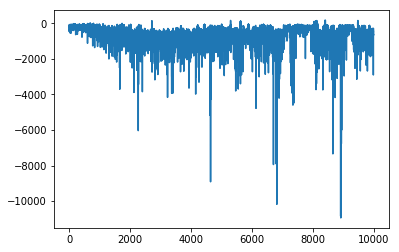

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('LunarLander-v2')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
lr,gamma = 0.01, 0.99
agent = Agent(num_states, num_actions, lr, gamma)
agent.C = 5000  #update the target network every K timestesp
agent.epsilon = 1.0
decay_factor = 0.999
epsilon_min = 0.05
agent.memory_size = 10**5
learning_start = 5000

#Train
EPISODES = 10**4
scores = []
step = 0
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        # env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        #learn
        if len(agent.memory) > learning_start:
            agent.replay()            #update the behavior model        
            agent.soft_update_target_network()
            
        #iterate
        step += 1
        if done:
            break
    
    #Learn & print results
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
np.savetxt('stats/scores_lunar_landing.txt',scores)

Ugh, its not learning anything.

### Compare to regular policy gradients

In [ ]:
#I computed the scores for the regular policy gradient in the, well, 'policy-gradient' foldee ;P
filename = '/home/kokeeffe/research/robocab/RL_practice/policy_gradients/stats/scores_lunar_landing.txt'
scores_regular = np.loadtxt(filename)
plt.plot(scores_regular)
plt.plot(scores)
plt.legend(['policy gradient','DQN'])

Looks good -- there is indeed smaller variance.

### Watch a smart agent

In [10]:
state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    #agent.remember(state[0], action, reward)
    state = next_state
env.close()

### Roughwork